In [32]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import VarianceThreshold

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import KFold

from sklearn.metrics import confusion_matrix

import seaborn as sns

## MIST dataset

In [2]:
mist = load_digits()

In [3]:
mist.data.shape

(1797, 64)

In [4]:
mist.target

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
mist.images.shape

(1797, 8, 8)

In [6]:
def plot_number(array):
    plt.figure(figsize=(1,1))
    plt.imshow(array, cmap='gray')
    plt.show()

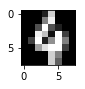

In [7]:
plot_number(mist.images[100])

In [9]:
X = mist.data

In [10]:
X.shape

(1797, 64)

## Removing pixels with low variance

In [12]:
var_selector = VarianceThreshold(0.05)
var_selector.fit(X)

VarianceThreshold(threshold=0.05)

In [13]:
var_selector.get_support()

array([False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [14]:
X2 = var_selector.transform(X)

In [15]:
X2.shape

(1797, 54)

In [16]:
y= mist.target

## Split into train and test dataset

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X2,y,test_size = 0.2)

In [20]:
X_train.shape

(1437, 54)

## KNN

In [25]:
estimator = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3,5,8,15]
}
grid = GridSearchCV(estimator,
                   param_grid,
                   cv = KFold(n_splits=4, shuffle=True))
grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 5, 8, 15]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [26]:
grid.best_params_

{'n_neighbors': 3}

In [27]:
grid.best_score_

0.98399443284620736

In [28]:
best_model = grid.best_estimator_

In [31]:
conf = confusion_matrix(y_true=y_train,y_pred=best_model.predict(X_train))

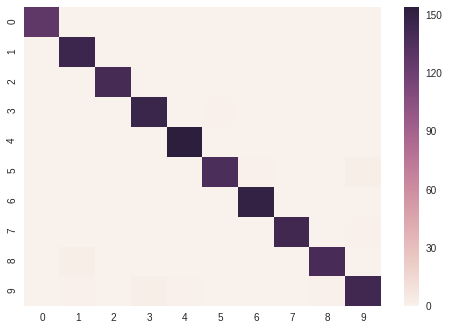

In [34]:
sns.heatmap(conf)
plt.show()